# BepiColombo PWI EFD E-field: L1a QL -- 2025/7/25

In [1]:
import copy
import datetime
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from spacepy import pycdf

/opt/homebrew/Caskroom/miniforge/base/envs/3.12/lib/python3.12/site-packages/spacepy/time.py:2448: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  _read_leaps()


In [2]:
sys.path.append('./lib/')
import Bepi_PWI_EFD_E_data as bepi_data
import Bepi_PWI_EFD_E_lib  as bepi_e
# import Bepi_PWI_EFD_cal_lib  as bepi_cal

# parameter set -- to be modified

In [3]:
# *** Dump ***
dump_mode = 1                           # 0: no-dump  1:plot dump

# *** CAL ***
unit_mode = 2                           # [Power]     0: RAW    1: V    2: V/m
band_mode = 0                           # [Power]     0: sum    1: /Hz
cal_mode  = 2                           # [Power]     0: background     1: CAL     2: all

# *** Unit ***
time_mode = 0                           # [Time]      0: Epoch   1: data number
gap_mode  = 1                           # [gap]       0: n/a     1: gap

# *** Power range set ***
p_raw_max = +10                         # background: 7.5   CAL: 10
p_raw_min = -10                         # background: 2.5   CAL: 5

# *** Directory set: set by User ***
work_dir = '/Users/user/0-python/Bepi_python/ql/'   # Plot dump folder

# get CDF data

In [4]:
mode_cdf = 0        # 0:flight  1:test
mode_tlm = 'l'      # l, m, h
mode_ant = 1        # 0:both    1:U(WPT)    2:V(MEF)

# TEST
# date = '2025060?'
date = '20250605'
# date = '20250606'
# date = '20250625'

# Flight -- only 'l'
# date='20250410'
# date='20240409'
# date='20231106'
date='20231026'           # WPT: CAL
# date='20230730'
# date='20230522'
# date='20230228'           # WPT: CAL
# date='20221107'
# date='20220517'
# date='20220311'
# date='20211124'
# date='20210617'
# date='20201217'
# date='20200304'
# date='20190630'
# date='2018080?'           # WPT latch release
# date='20190807'           # WPT latch release
# date='20190806'           # WPT latch release
# date='20190805'           # WPT precheck
# date='20190802'           # WPT precheck
# date='20190701'           # WPT detailed check
# date='20190515'
# date='201811[0-1][9,0]'   # Init check
# date='20181111'           # Init check
# date='20181110'           # Init check
# date='20181109'           # Init check

data_dir, data_list = bepi_data.datalist(date, mode_tlm, mode_cdf)       # [date]   yyyymmdd: group read    others: file list

/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_l-e_20231026*.cdf
/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/
['bc_mmo_pwi-efd_l1_l-e_20231026_r01-v00-00.cdf']


In [5]:
class struct:
    pass
data = struct()
num_list = len(data_list)
for i in range(num_list):
    data_name = data_list[i];   cdf_file = data_dir + data_name
    cdf = pycdf.CDF(cdf_file);  data1 = bepi_e.efd_E_read(cdf, mode_tlm)
    if i==0: data = data1;                               
    else:    data = bepi_e.efd_E_add(data, data1, mode_tlm)
    print(i, data.Eu.shape, cdf_file)
data_name = os.path.split(data_name)[1];            print("data name:", data_name)

0 (8277, 4) /Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_l-e_20231026_r01-v00-00.cdf
data name: bc_mmo_pwi-efd_l1_l-e_20231026_r01-v00-00.cdf


In [6]:
data = bepi_e.efd_E_shaping(data, cal_mode, mode_tlm, mode_ant)

In [7]:
print(    "    data.Eu(,dt)[V]:", data.Eu.shape,             data.Eu[0][0],          data.Eu[-1][-1])
print(    "    data.Ev(,dt)[V]:", data.Ev.shape,             data.Ev[0][0],          data.Ev[-1][-1])
if mode_tlm!='h':
    print("     data.EFD_Eu_ENA:", data.EFD_Eu_ENA.shape,    "\t", data.EFD_Eu_ENA[0],      data.EFD_Eu_ENA[-1])
    print("     data.EFD_Ev_ENA:", data.EFD_Ev_ENA.shape,    "\t", data.EFD_Ev_ENA[0],      data.EFD_Ev_ENA[-1])
    print("      data.EFD_Hdump:", data.EFD_Hdump.shape,     "\t", data.EFD_Hdump[0],       data.EFD_Hdump[-1])
    print("      data.EFD_sweep:", data.EFD_sweep.shape,     "\t", data.EFD_sweep[0],       data.EFD_sweep[-1])
    print("      data.PRE_U_PWR:", data.PRE_U_PWR.shape,     "\t", data.PRE_U_PWR[0],       data.PRE_U_PWR[-1])
    print("      data.PRE_V_PWR:", data.PRE_V_PWR.shape,     "\t", data.PRE_V_PWR[0],       data.PRE_V_PWR[-1])
    print("      data.PRE_U_CAL:", data.PRE_U_CAL.shape,     "\t", data.PRE_U_CAL[0],       data.PRE_U_CAL[-1])
    print("      data.PRE_V_CAL:", data.PRE_V_CAL.shape,     "\t", data.PRE_V_CAL[0],       data.PRE_V_CAL[-1])
    print("     data.PRE_U_LOOP:", data.PRE_U_LOOP.shape,    "\t", data.PRE_U_LOOP[0],      data.PRE_U_LOOP[-1])
    print("       data.AM2P_ENA:", data.AM2P_ENA.shape,      "\t", data.AM2P_ENA[0],        data.AM2P_ENA[-1])
print(    " data.EFD_saturation:", data.EFD_saturation.shape,"\t", data.EFD_saturation[0],  data.EFD_saturation[-1])
print(    "   data.EFD_spinrate:", data.EFD_spinrate.shape,  "\t", data.EFD_spinrate[0],    data.EFD_spinrate[-1])
print(    "  data.EFD_spinphase:", data.EFD_spinphase.shape, "\t", data.EFD_spinphase[0],   data.EFD_spinphase[-1])
print(    "          data.epoch:", data.epoch.shape,         "\t", data.epoch[0],           data.epoch[-1])
print(    "         data.EFD_TI:", data.EFD_TI.shape,        "\t", '{:X}'.format(data.EFD_TI[0]), '{:X}'.format(data.EFD_TI[-1]))

    data.Eu(,dt)[V]: (8277, 4) 8.226691 -4.570384
    data.Ev(,dt)[V]: (8277, 4) nan nan
     data.EFD_Eu_ENA: (8277,) 	 1 0
     data.EFD_Ev_ENA: (8277,) 	 1 0
      data.EFD_Hdump: (8277,) 	 0 0
      data.EFD_sweep: (8277,) 	 0 1
      data.PRE_U_PWR: (8277,) 	 1 0
      data.PRE_V_PWR: (8277,) 	 1 0
      data.PRE_U_CAL: (8277,) 	 0 0
      data.PRE_V_CAL: (8277,) 	 0 0
     data.PRE_U_LOOP: (8277,) 	 0 0
       data.AM2P_ENA: (8277,) 	 0 0
 data.EFD_saturation: (8277,) 	 1 0
   data.EFD_spinrate: (8277,) 	 4.136 4.136
  data.EFD_spinphase: (8277,) 	 292.88007 356.53003
          data.epoch: (8277,) 	 2023-10-26 12:42:10.125000 2023-10-26 15:12:31.125000
         data.EFD_TI: (8277,) 	 13A000 59FA00


In [8]:
date1 = data.epoch[0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[-1]; date2 = date2.strftime('%Y/%m/%d %R:%S')
str_date = date1 + "  -  " + date2
n_time0 = data.n_time

if data.n_time>1: 
    print("    Epoch:", str_date, "(interval:", data.epoch[1] - data.epoch[0], data.epoch[-1] - data.epoch[-2], ")")
else:
    print("    Epoch:", str_date)
print("  Samples:", n_time0)

    Epoch: 2023/10/26 12:42:10  -  2023/10/26 15:12:31 (interval: 0:00:01 0:00:01 )
  Samples: 8277


In [9]:
E = copy.deepcopy(data)

### M data -- time resolution up

In [10]:
from datetime import timedelta
Epoch_1d = E.epoch.tolist();   Epoch_E = []
if (data.n_dt > 1):
    for i in range(data.n_dt):
        Epoch_E += Epoch_1d
    for i in range(n_time0):
        for j in range(data.n_dt):
            Epoch_E[i*data.n_dt + j] = Epoch_1d[i] + timedelta(seconds = j/data.n_dt)
else:
    Epoch_E += Epoch_1d
n_time1 = n_time0 * data.n_dt; num_1d = np.arange(n_time1)

In [11]:
# pot = bepi_cal.pot_cal(pot)     # CAL
E.cf       = 0.0
E.str_unit = "mV"

### Peak

In [12]:
bepi_e.E_peak(E, n_time0)

[ All   Peak] <Eu> +9.14e+00 -5.03e+00 	<Ev> +nan +nan
[     0 peak] <Eu> +8.23e+00 +8.23e+00 	<Ev> +nan +nan
[  4138 peak] <Eu> +8.23e+00 +8.23e+00 	<Ev> +nan +nan
[  8276 peak] <Eu> -4.57e+00 -4.57e+00 	<Ev> +nan +nan


In [13]:
p_max0 = p_raw_max + E.cf/10;  p_min0 = p_raw_min + E.cf/10
p_max0  = np.ceil( np.nanmax( [np.nanmax(E.Eu), np.nanmax(E.Ev)] )*5)/5 + 1
p_min0  = np.ceil( np.nanmin( [np.nanmin(E.Eu), np.nanmin(E.Ev)] )*5)/5 - 1
print("conversion factor:", '{:.1f}'.format(E.cf), "    MAX-min:", '{:.1f}'.format(p_max0), '{:.1f}'.format(p_min0), "   str_unit:", E.str_unit)

conversion factor: 0.0     MAX-min: 10.2 -6.0    str_unit: mV


/var/folders/4p/zmpl1nyj27n8j256l_dttd840000gn/T/ipykernel_49685/1716659663.py:2: RuntimeWarning: All-NaN slice encountered
  p_max0  = np.ceil( np.nanmax( [np.nanmax(E.Eu), np.nanmax(E.Ev)] )*5)/5 + 1
/var/folders/4p/zmpl1nyj27n8j256l_dttd840000gn/T/ipykernel_49685/1716659663.py:3: RuntimeWarning: All-NaN slice encountered
  p_min0  = np.ceil( np.nanmin( [np.nanmin(E.Eu), np.nanmin(E.Ev)] )*5)/5 - 1


In [14]:
if   mode_tlm=='l':     # L
    str_Eu = 'Eu_4Hz (L)';    str_Ev = 'Ev_4Hz (L)';    str_E = 'E_4Hz (L)'
elif mode_tlm=='m':     # M
    str_Eu = 'Eu_8Hz (M)';    str_Ev = 'Ev_8Hz (M)';    str_E = 'E_8Hz (M)'
else:                   # H
    str_Eu = 'Eu_128Hz (H)';  str_Ev = 'Ev_128Hz (H)';  str_E = 'E_128Hz (H)'


In [15]:
# NAN
if gap_mode == 1 and time_mode == 0:
    for i in range(n_time0-1):
        dt = E.epoch[i+1] - E.epoch[i]
        if dt.total_seconds() > 60:  bepi_e.E_nan(E, i)
E.E = (E.Eu + E.Ev)/2

[gap] 0:04:26 1324 2023-10-26 13:07:32.125000 1325 2023-10-26 13:11:58.125000
[gap] 0:02:47 8011 2023-10-26 15:03:24.125000 8012 2023-10-26 15:06:11.125000
[gap] 0:01:40 8028 2023-10-26 15:06:27.125000 8029 2023-10-26 15:08:07.125000


# RAW plot

[-0.5, 33107.5]
[-0.5, 8276.5]


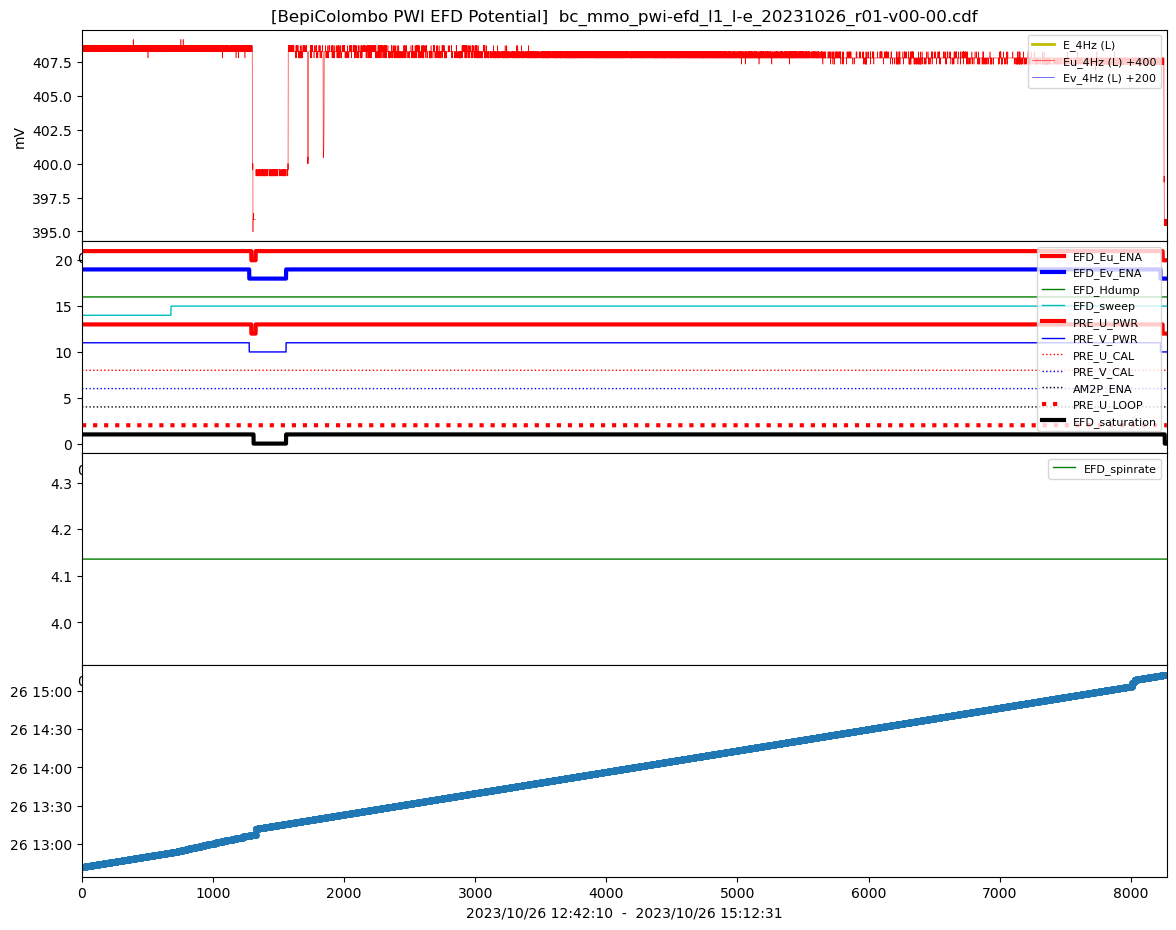

In [16]:
n0 = 0;             n1     = n_time0
# n0 = n_time0//10;   n1     = n_time0//6-10
p_max  = p_max0+2;  p_min  = p_min0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(4, 1, 1);  ax2 = fig.add_subplot(4, 1, 2);  ax3 = fig.add_subplot(4, 1, 3);  ax4 = fig.add_subplot(4, 1, 4)
ax1.plot(np.ravel(E.E [n0:n1]),                    '-y', linewidth=2.0, label=str_E)
ax1.plot(np.ravel(E.Eu[n0:n1])+400,                '-r', linewidth=0.4, label=str_Eu + ' +400')
ax1.plot(np.ravel(E.Ev[n0:n1])+200,                '-b', linewidth=0.4, label=str_Ev + ' +200')
#
if mode_tlm!='h':
    ax2.plot(np.ravel(data.EFD_Eu_ENA[n0:n1]) +20, '-r', linewidth=3.0, label='EFD_Eu_ENA')       # ???
    ax2.plot(np.ravel(data.EFD_Ev_ENA[n0:n1]) +18, '-b', linewidth=3.0, label='EFD_Ev_ENA')       # ???
    ax2.plot(np.ravel(data.EFD_Hdump[n0:n1])  +16, '-g', linewidth=1.0, label='EFD_Hdump')         # ???
    ax2.plot(np.ravel(data.EFD_sweep[n0:n1])  +14, '-c', linewidth=1.0, label='EFD_sweep')
    ax2.plot(np.ravel(data.PRE_U_PWR[n0:n1])  +12, '-r', linewidth=3.0, label='PRE_U_PWR')         # ???
    ax2.plot(np.ravel(data.PRE_V_PWR[n0:n1])  +10, '-b', linewidth=1.0, label='PRE_V_PWR')
    ax2.plot(np.ravel(data.PRE_U_CAL[n0:n1])   +8, ':r', linewidth=1.0, label='PRE_U_CAL')
    ax2.plot(np.ravel(data.PRE_V_CAL[n0:n1])   +6, ':b', linewidth=1.0, label='PRE_V_CAL')
    ax2.plot(np.ravel(data.AM2P_ENA[n0:n1])    +4, ':k', linewidth=1.0, label='AM2P_ENA')
    ax2.plot(np.ravel(data.PRE_U_LOOP[n0:n1])  +2, ':r', linewidth=3.0, label='PRE_U_LOOP')        # ???
ax2.plot(np.ravel(data.EFD_saturation[n0:n1]),     '-k', linewidth=3.0, label='EFD_saturation')    # ???
#
ax3.plot(np.ravel(data.EFD_spinrate[n0:n1]),       '-g', linewidth=1.0, label='EFD_spinrate')
# ax4.plot(np.ravel(data.EFD_spinphase),      '-r', linewidth=1.0, label='EFD_spinphase')
#
ax4.plot(np.ravel(data.epoch[n0:n1]),               '.', markersize=8)

ax1.set_ylabel(E.str_unit);  ax4.set_xlabel(str_date)
#
title_label = '[BepiColombo PWI EFD Potential]  ' + data_name;  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8);  ax2.legend(loc='upper right', fontsize=8);  ax3.legend(loc='upper right', fontsize=8)

xlim=[-.5, len(np.ravel(data.Eu[n0:n1])) -.5];    print(xlim); ax1.set_xlim(xlim)
xlim=[-.5, len(np.ravel(data.epoch[n0:n1]))-.5];  print(xlim); ax2.set_xlim(xlim); ax3.set_xlim(xlim); ax4.set_xlim(xlim)
# ylim=[10**p_min, 10**p_max];                    ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_raw2.png'
    fig.savefig(png_fname)

# E-field

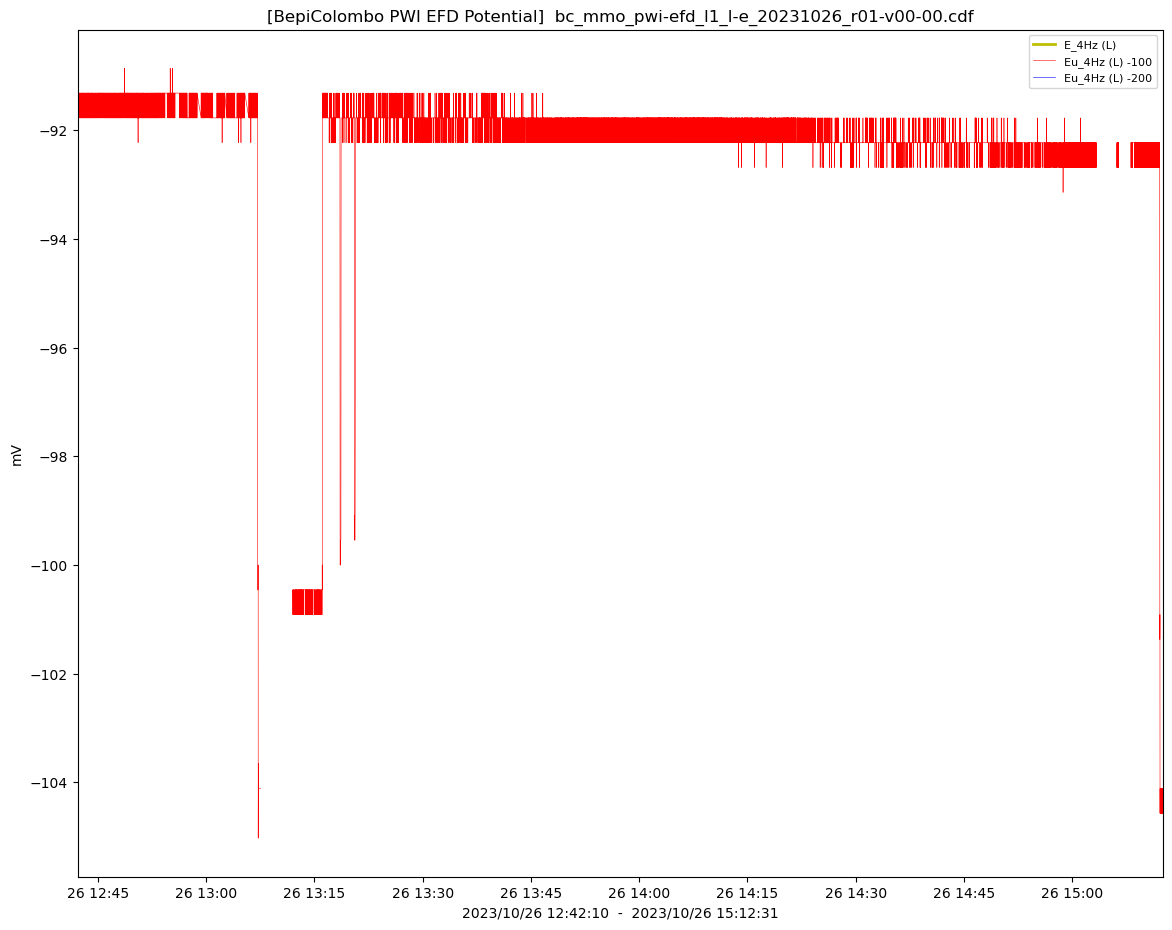

In [18]:
n0     = 0;                 n1     = n_time0
# n0     = n_time0//10;       n1     = n_time0//6-10
n0e    = n0 * data.n_dt;    n1e    = n1 * data.n_dt
p_max  = p_max0+2;          p_min  = p_min0

fig = plt.figure(figsize=(14, 11))
if time_mode == 1:
    ax1 = fig.add_subplot(2, 1, 1); ax2 = fig.add_subplot(2, 1, 2)
    ax1.plot(num_1d[n0e:n1e],  np.ravel(E.E [n0:n1]),       '-y', linewidth=2.0, label=str_E)
    ax1.plot(num_1d[n0e:n1e],  np.ravel(E.Eu[n0:n1])-100,   '-r', linewidth=0.4, label=str_Eu + ' -100')
    ax1.plot(num_1d[n0e:n1e],  np.ravel(E.Ev[n0:n1])-200,   '-b', linewidth=0.4, label=str_Eu + ' -200')
    ax2.plot(num_1d[n0e:n1e],  Epoch_E[n0e:n1e],            '-k', linewidth=2.0, label='Epoch')
    ax2.set_xlabel(str_date)
else:
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(Epoch_E[n0e:n1e], np.ravel(E.E [n0:n1]),       '-y', linewidth=2.0, label=str_E)
    ax1.plot(Epoch_E[n0e:n1e], np.ravel(E.Eu[n0:n1])-100,   '-r', linewidth=0.4, label=str_Eu + ' -100')
    ax1.plot(Epoch_E[n0e:n1e], np.ravel(E.Ev[n0:n1])-200,   '-b', linewidth=0.4, label=str_Eu + ' -200')
    ax1.set_xlabel(str_date)
ax1.set_ylabel(E.str_unit)
#
title_label = '[BepiColombo PWI EFD Potential]  ' + data_name;  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8)

if time_mode == 1:
    xlim=[num_1d[n0e], num_1d[n1e-1]]
    ax1.set_xlim(xlim); ax2.set_xlim(xlim)
else:
    xlim=[Epoch_E[n0e], Epoch_E[n1e-1]]
    #E_min = '2024-08-21 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
    ax1.set_xlim(xlim)
# ylim=[p_min, p_max];  ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_E.png'
    fig.savefig(png_fname)